In [1]:
# Imports - Primary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import 1 - Metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
filename = ('C:/Users/abadg/Downloads/cust_seg.csv')

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [4]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [5]:
# Fill In Missing Values using Median

df.fillna(df.median().round(1), inplace=True)

In [6]:
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

In [7]:
df_1 = df[['Income', 'Card Debt']]

df_1.head()

,Income,Card Debt
0,19,0.124
1,100,4.582
2,57,6.111
3,19,0.681
4,253,9.308


In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()

In [9]:
# Fit & transform data.
scaled_df_1 = scaler.fit_transform(df_1)

Text(0, 0.5, 'inertia')

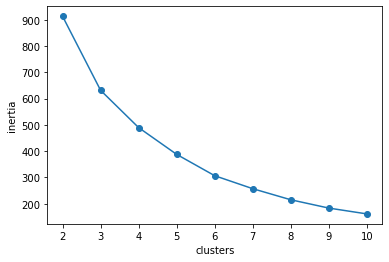

In [10]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df_1)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = 'o')
plt.xlabel('clusters')
plt.ylabel('inertia')

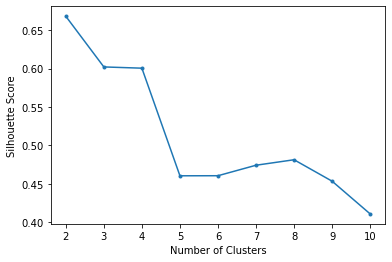

In [11]:
# Visualize different silhouette scores
# The Higher the Silhouette score, the better.


# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df_1)
  silhouette_scores.append(silhouette_score(scaled_df_1, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [12]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df_1)

KMeans(n_clusters=2)

In [13]:
# Run this code after selectng how many n_clusters
df_1['cluster'] = kmeans.labels_

C:\Users\abadg\AppData\Local\Temp/ipykernel_46076/248831118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cluster'] = kmeans.labels_


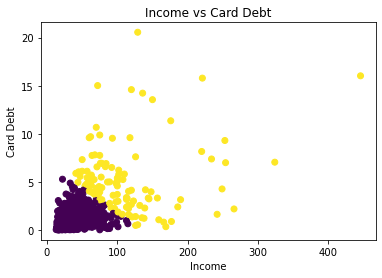

In [14]:
# Save the cluster labels to the dataframe df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df_1['Income'], df_1['Card Debt'], c = df_1['cluster'])
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.title('Income vs Card Debt');

In [15]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df_1)
kmeans3.fit(scaled_df_1)

df['cluster2'] = kmeans2.labels_

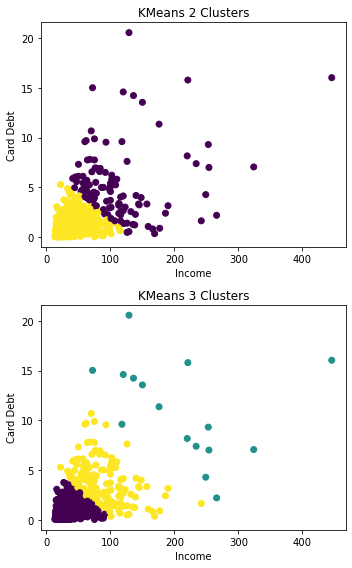

In [16]:
# Save the cluster lables to the dataframe df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['Card Debt'], c = df['cluster2'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Card Debt')
axes[0].set_title('KMeans 2 Clusters')

# Visualize KMeans 3 Clusters
axes[1].scatter(df['Income'], df['Card Debt'], c = df['cluster3'])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Card Debt')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();

In [17]:
df_2 = df[['Card Debt', 'DebtIncomeRatio']]

# Fit & transform data.
scaled_df_2 = scaler.fit_transform(df_2)

Text(0, 0.5, 'inertia')

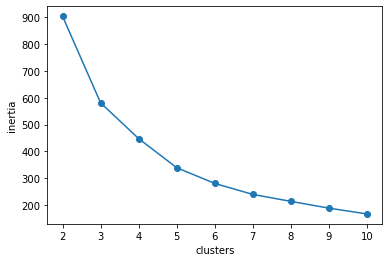

In [18]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans4 = KMeans(n_clusters=k)  
    kmeans4.fit(scaled_df_2)  
    inertias.append(kmeans4.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = 'o')
plt.xlabel('clusters')
plt.ylabel('inertia')

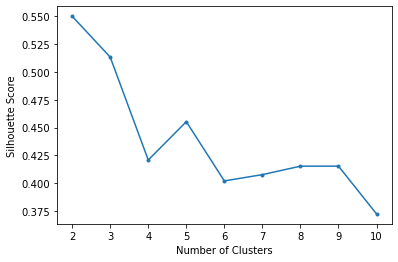

In [19]:
# Visualize different silhouette scores
# The Higher the Silhouette score, the better.


# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans4 = KMeans(n_clusters = i)
  kmeans4.fit(scaled_df_2)
  silhouette_scores.append(silhouette_score(scaled_df_2, kmeans4.labels_))

# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [20]:
# Instantiate KMeans
kmeans4 = KMeans(n_clusters = 2)
kmeans4.fit(scaled_df_2)

KMeans(n_clusters=2)

In [21]:
# Run this code after selectng how many n_clusters
df_2['cluster'] = kmeans4.labels_

C:\Users\abadg\AppData\Local\Temp/ipykernel_46076/1494426264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cluster'] = kmeans4.labels_


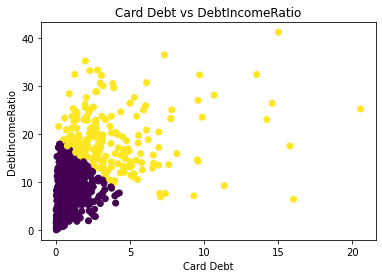

In [22]:
# Save the cluster labels to the dataframe df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df_2['Card Debt'], df_2['DebtIncomeRatio'], c = df_2['cluster'])
plt.xlabel('Card Debt')
plt.ylabel('DebtIncomeRatio')
plt.title('Card Debt vs DebtIncomeRatio');

In [23]:
df_3 = df[['Income', 'DebtIncomeRatio']]

# Fit & transform data.
scaled_df_3 = scaler.fit_transform(df_3)

Text(0, 0.5, 'inertia')

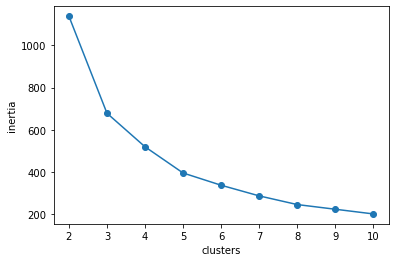

In [24]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):  
    kmeans5 = KMeans(n_clusters=k)  
    kmeans5.fit(scaled_df_3)  
    inertias.append(kmeans5.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = 'o')
plt.xlabel('clusters')
plt.ylabel('inertia')

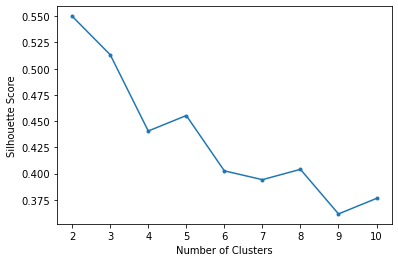

In [25]:
# Visualize different silhouette scores
# The Higher the Silhouette score, the better.


# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans5 = KMeans(n_clusters = i)
  kmeans5.fit(scaled_df_2)
  silhouette_scores.append(silhouette_score(scaled_df_2, kmeans5.labels_))

# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [26]:
# Instantiate KMeans
kmeans5 = KMeans(n_clusters = 3)
kmeans5.fit(scaled_df_3)

KMeans(n_clusters=3)

In [27]:
# Run this code after selectng how many n_clusters
df_3['cluster'] = kmeans5.labels_

C:\Users\abadg\AppData\Local\Temp/ipykernel_46076/1036440850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['cluster'] = kmeans5.labels_


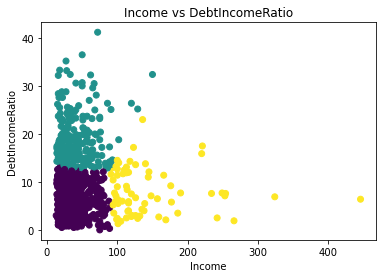

In [28]:
# Save the cluster labels to the dataframe df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df_3['Income'], df_3['DebtIncomeRatio'], c = df_3['cluster'])
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Income vs DebtIncomeRatio');